# **Importing a pre-trained model **

In [1]:
!pip install --upgrade tensorflow
import urllib.request
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
weights_url="https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file="inception_v3.h5"
urllib.request.urlretrieve(weights_url,weights_file)
pre_trained_model=InceptionV3(input_shape=(128,128,3),include_top=False,weights=None)
pre_trained_model.load_weights(weights_file)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 38.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


**Mounting the google drive to load the xray images**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 63, 63, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 63, 63, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 63, 63, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 61, 61, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 61, 61, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 61, 61, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 61, 61, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 61, 61, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 61, 61, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 30, 30, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 30, 30, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 30, 30, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 30, 30, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 28, 28, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 28, 28, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

**Addinf the last output layer to the model**

In [4]:
from tensorflow.keras import layers
for layer in pre_trained_model.layers:
  layer.trainable=False
last_layer=pre_trained_model.get_layer('mixed7')
print('last layer output shape:',last_layer.output.shape)
last_output=last_layer.output

x=layers.Flatten()(last_output)
x=layers.Dense(1024,activation='relu')(x)
x=layers.Dense(2,activation='sigmoid')(x)

last layer output shape: (None, 6, 6, 768)


In [5]:
from tensorflow.keras import Model
model=Model(inputs=pre_trained_model.input,outputs=x)

In [6]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 63, 63, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 63, 63, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 63, 63, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 61, 61, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 61, 61, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 61, 61, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 61, 61, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 61, 61, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 61, 61, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 30, 30, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 30, 30, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 30, 30, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 30, 30, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 28, 28, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 28, 28, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 37,289,890 (142.25 MB)

 Trainable params: 28,314,626 (108.01 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

**Compiling the model using reduced learning rate**

In [7]:
from tensorflow.keras.optimizers import RMSprop
opt=RMSprop(learning_rate=0.0001)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

**Loading the necessary datasets**

In [8]:
from PIL import Image
train_fold_normal=('/content/drive/MyDrive/project/train_data/NORMAL')
train_fold_pneumonia=('/content/drive/MyDrive/project/train_data/PNEUMONIA')
test_fold_normal=('/content/drive/MyDrive/project/test_data/NORMAL')
test_fold_pneumonia=('/content/drive/MyDrive/project/test_data/PNEUMONIA')
val_fold_normal=('/content/drive/MyDrive/project/val_data/NORMAL')
val_fold_pneumonia=('/content/drive/MyDrive/project/val_data/PNEUMONIA')

**Importing the dependencies**

In [9]:
import os,pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns

**Converting the image data into a numpy array and storing them in a variable**

In [10]:
x_images=[]
y_labels=[]
for file in os.listdir(train_fold_normal):
  img=Image.open(os.path.join(train_fold_normal,file)).convert('RGB')
  img=img.resize((128,128))
  img=np.array(img)
  x_images.append(img)
  y_labels.append(0)

In [11]:
for file in os.listdir(train_fold_pneumonia):
  img=Image.open(os.path.join(train_fold_pneumonia,file)).convert('RGB')
  img=img.resize((128,128))
  img=np.array(img)
  x_images.append(img)
  y_labels.append(1)

In [12]:
for file in os.listdir(test_fold_normal):
  img=Image.open(os.path.join(test_fold_normal,file)).convert('RGB')
  img=img.resize((128,128))
  img=np.array(img)
  x_images.append(img)
  y_labels.append(0)

In [13]:
for file in os.listdir(test_fold_pneumonia):
  img=Image.open(os.path.join(test_fold_pneumonia,file)).convert('RGB')
  img=img.resize((128,128))
  img=np.array(img)
  x_images.append(img)
  y_labels.append(1)

In [14]:
x_valimages=[]
y_vallabels=[]
for file in os.listdir(val_fold_normal):
  img=Image.open(os.path.join(val_fold_normal,file)).convert('RGB')
  img=img.resize((128,128))
  img=np.array(img)
  x_valimages.append(img)
  y_vallabels.append(0)
for file in os.listdir(val_fold_pneumonia):
  img=Image.open(os.path.join(val_fold_pneumonia,file)).convert('RGB')
  img=img.resize((128,128))
  img=np.array(img)
  x_valimages.append(img)
  y_vallabels.append(1)

**converting the list into numpy array**

In [15]:
x_images=np.array(x_images)
y_labels=np.array(y_labels)
x_valimages=np.array(x_valimages)
y_vallabels=np.array(y_vallabels)

**Verifying its shape**

In [16]:
print("xray images1",x_images.shape)
print("y labels for the xrays",y_labels.shape)
print('validation images',x_valimages.shape)
print('validation labels',y_vallabels.shape)

xray images1 (5897, 128, 128, 3)
y labels for the xrays (5897,)
validation images (16, 128, 128, 3)
validation labels (16,)


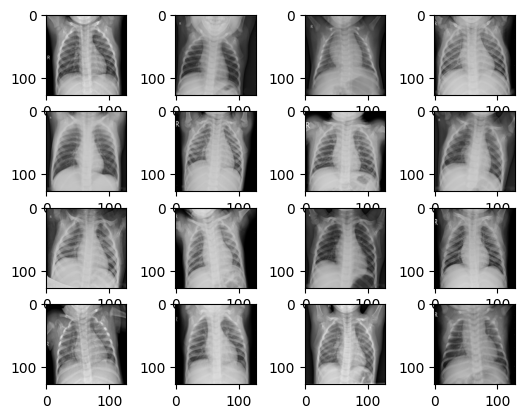

In [17]:
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(x_images[i])

**Spliting into training and validation data**

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_images,y_labels,test_size=0.1,random_state=42)
print('x train',x_train.shape)
print('y train',y_train.shape)
print('x test',x_test.shape)
print('y test',y_test.shape)

x train (5307, 128, 128, 3)
y train (5307,)
x test (590, 128, 128, 3)
y test (590,)


In [19]:
trainimage=x_train.reshape(len(x_train),-1).astype('float32')/255
testimage=x_test.reshape(len(x_test),-1).astype('float32')/255
valimages=x_valimages.reshape(len(x_valimages),-1).astype('float32')/255
trainimage=trainimage.reshape(-1,128,128,3)
testimage=testimage.reshape(-1,128,128,3)
valimages=valimages.reshape(-1,128,128,3)
print("reshaped train data shape",trainimage.shape)
print("reshaped test data shape",testimage.shape)
print("reshaped val data shape",valimages.shape)

reshaped train data shape (5307, 128, 128, 3)
reshaped test data shape (590, 128, 128, 3)
reshaped val data shape (16, 128, 128, 3)


In [20]:
from tensorflow.keras.utils import to_categorical
trainlabels=to_categorical(y_train,num_classes=2)
testlabels=to_categorical(y_test,num_classes=2)
vallabels=to_categorical(y_vallabels,num_classes=2)
trainlabels.shape,vallabels.shape

((5307, 2), (16, 2))

**Training the model**

In [21]:
history=model.fit(trainimage,trainlabels,epochs=10,batch_size=32,validation_data=(testimage,testlabels))
test_loss,test_accuracy=model.evaluate(testimage,testlabels)
print('test loss',test_loss)
print('test accuracy',test_accuracy)

Epoch 1/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 33s 126ms/step - accuracy: 0.8867 - loss: 0.3489 - val_accuracy: 0.9593 - val_loss: 0.1195
Epoch 2/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.9658 - loss: 0.0991 - val_accuracy: 0.9661 - val_loss: 0.0905
Epoch 3/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9719 - loss: 0.0790 - val_accuracy: 0.9508 - val_loss: 0.1345
Epoch 4/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9694 - loss: 0.0763 - val_accuracy: 0.9644 - val_loss: 0.0989
Epoch 5/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.9820 - loss: 0.0487 - val_accuracy: 0.9729 - val_loss: 0.0922
Epoch 6/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9838 - loss: 0.0447 - val_accuracy: 0.9559 - val_loss: 0.1372
Epoch 7/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9893 - loss: 0.0311 - val_accuracy: 0.9661 - val_loss: 0.1088
Epoch 8/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9936 - loss: 0.0209 - val_a

**Plotting graph between accuracy and val_accuracy**

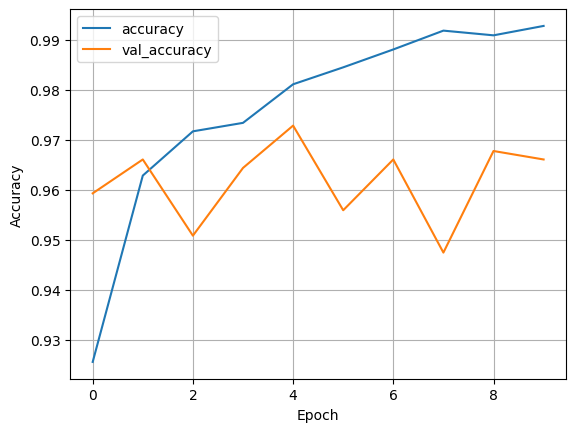

In [22]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

**Plotting graph between loss and val_loss**

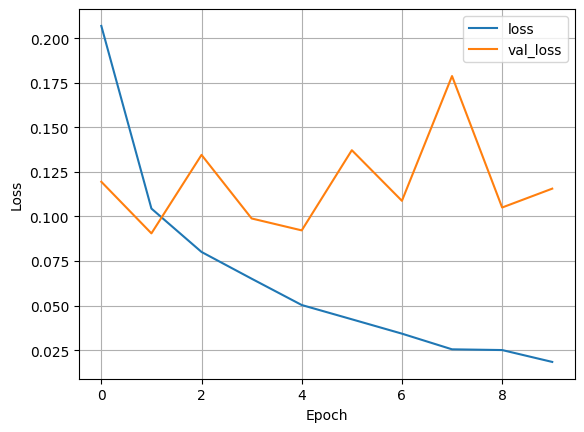

In [23]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

**Making predictions using the trained model**

In [24]:
prediction=model.predict(valimages)
pred_class=np.argmax(prediction,axis=1)
print('Predicted class index',pred_class)
class_label=['NORMAL','PNEUMONIA']
pred_labels=[class_label[i] for i in pred_class]
print('predicted class label',pred_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted class index [0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
predicted class label ['NORMAL', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA']
